# YOUSSEF MOHAMED HELMY

# <u> Machine Learning Internship at UneeQInterns -Task 2  [Sentiment Analysis on Social Media reviews]</u>

### <i>In this Project , we build a Sentiment Analysis on social media reviews System using Machine Learning with python . we use Artificial Neural Network for Classification and we apply some NLP Techinques on our text data .</i>

## Importing Required Libraries

In [47]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, LeakyReLU # type: ignore
from tensorflow.keras import regularizers # type: ignore
sns.set_style("darkgrid")


## Loading our Data

In [25]:
df=pd.read_csv("Reddit_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [26]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


# <u> Preprocessing :-</u>

## Checking Missing Values 

In [27]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

## Handling Missing Values

In [28]:
df.fillna(" ",inplace=True)

In [29]:
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

## Checking duplicate values

In [30]:
df.duplicated().sum()

450

In [31]:
df.drop_duplicates(inplace=True)

## Downloading Stopwords for Preprocessing Step 

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\engyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Building a Stemming Function 

### Stemming---> reducing word to its root                                                   
<i> Ex--> actor ,actress ,acting -----> act. </i>

In [33]:
port_stem=PorterStemmer()

In [34]:
def Stemming (content):
    stemmed_content=re.sub('^a-zA-Z'," ",content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=" ".join(stemmed_content)
    return stemmed_content

## Applying Stemming Function on clean_comment column

In [35]:
df['clean_comment']=df['clean_comment'].apply(Stemming)

In [36]:
df['clean_comment'].head()

0    famili mormon never tri explain still stare pu...
1    buddhism much lot compat christian especi cons...
2    serious say thing first get complex explain no...
3    learn want teach differ focu goal wrap paper b...
4    benefit may want read live buddha live christ ...
Name: clean_comment, dtype: object

## Separating Features and  Target 

In [37]:
x=df['clean_comment']
y=df['category']

In [38]:
y.value_counts()

category
 1    15771
 0    12778
-1     8250
Name: count, dtype: int64

## Applying TF_IDF Vectorizer

In [39]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)


## Split Data into Train and Test Data

In [40]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.333,random_state=42)

In [41]:
# Remap label values
train_y = train_y.replace({-1: 0, 0: 1, 1: 2})
test_y = test_y.replace({-1: 0, 0: 1, 1: 2})

## <u> Applying Artificial Neural Network for Classification :- </u>

### Define the Neural Network model

In [42]:
model = Sequential([
    Dense(128, input_shape=(train_x.shape[1],), activation=LeakyReLU(alpha=0.01),kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation= LeakyReLU(alpha=0.01),kernel_regularizer=regularizers.l2(0.01)),
    Dense(3, activation='softmax')  # Output layer with 3 units for 3 classes (negative, neutral, positive)
])

c:\Users\engyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\engyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [43]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     5,152,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,160,707 (19.69 MB)

 Trainable params: 5,160,707 (19.69 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [44]:

history = model.fit(train_x, train_y,
                    epochs=20,
                    batch_size=32,
                    validation_split = 0.15)


Epoch 1/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.4782 - loss: 1.4003 - val_accuracy: 0.6377 - val_loss: 1.1012
Epoch 2/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.6428 - loss: 1.0835 - val_accuracy: 0.6559 - val_loss: 1.0477
Epoch 3/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.6750 - loss: 1.0117 - val_accuracy: 0.6673 - val_loss: 1.0010
Epoch 4/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.6847 - loss: 0.9638 - val_accuracy: 0.6711 - val_loss: 0.9686
Epoch 5/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6915 - loss: 0.9304 - val_accuracy: 0.6738 - val_loss: 0.9517
Epoch 6/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.6939 - loss: 0.8981 - val_accuracy: 0.6898 - val_loss: 0.9126
Epoch 7/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.7068 - loss: 0.8621 - val_accuracy: 0.6820 - val_loss: 0.9046
Epoch 8/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.7166 - loss: 0.8343 - 

### Evaluate the model

In [45]:

train_loss, train_accuracy = model.evaluate(train_x, train_y, verbose=0)
test_loss, test_accuracy = model.evaluate(test_x, test_y, verbose=0)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Training Accuracy: 76.08%
Test Accuracy: 70.93%


# Plot training and Validation Loss Graph

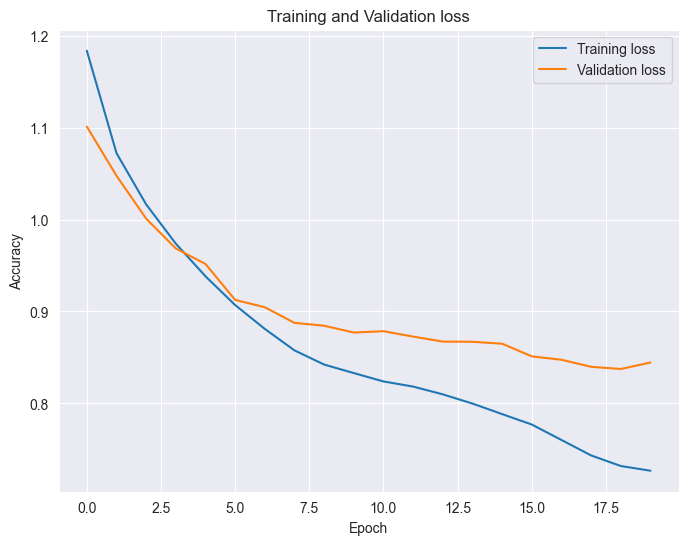

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()